In [1]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
torch.cuda.empty_cache()

Using cuda device


In [3]:
mat = scipy.io.loadmat('DynCislaData_Python.mat')
mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'XTest', 'XTrain', 'YTest', 'YTrain'])

In [4]:
xtrain = mat['XTrain']
ytrain = mat['YTrain']
XTest = mat['XTest']
YTest = mat['YTest']
print(type(xtrain))
print(len(xtrain))
print(type(XTest))
print(len(XTest))


<class 'numpy.ndarray'>
200
<class 'numpy.ndarray'>
98


In [5]:
print(type(ytrain))
print(len(ytrain))
ytrain.shape

<class 'numpy.ndarray'>
200


(200, 1)

In [6]:
ytrain

array([[ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 8],
       [ 2],
       [ 4],
       [ 5],
       [ 1],
       [ 2],
       [ 7],
       [ 7],
       [ 1],
       [ 8],
       [ 5],
       [ 5],
       [ 3],
       [ 5],
       [ 7],
       [ 7],
       [ 1],
       [ 1],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 7],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 5],
       [ 8],
       [ 8],
       [ 1],
       [ 2],
       [ 4],
       [ 4],
       [ 7],
       [ 1],
       [ 1],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 7],
       [10],
       [ 1],
       [ 2],
       [ 8],
       [ 8],
       [ 3],
       [ 8],
       [ 8],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 8],
       [ 5],

In [7]:
xtrain.shape


(200, 1)

In [8]:
xtrain[20][0][:][:]

array([[103, 104, 106, 101,  96,  88,  76,  62,  47,  36,  23,  13,   5,
          1,   0,   1,   5,  12,  26,  42,  63,  84, 103, 119, 131, 142,
        147, 150, 154, 153, 149, 140, 131, 115, 109, 110, 110],
       [371, 371, 371, 368, 362, 352, 338, 322, 300, 289, 269, 254, 242,
        230, 221, 213, 204, 198, 193, 189, 193, 193, 194, 194, 195, 196,
        193, 190, 184, 172, 153, 130, 103,  70,  38,  15,   0]],
      dtype=uint16)

In [9]:
xtrain[80][0][:][:]

array([[ 66,  66,  66,  67,  66,  67,  66,  66,  66,  65,  66,  64,  65,
         65,  66,  66,  68,  68,  68,  70,  71,  72,  73,  74,  79,  80,
         81,  82,  82,  81,  79,  76,  72,  67,  61,  55,  47,  40,  31,
         24,  17,  12,   7,   3,   1,   0],
       [  0,   1,   2,   3,   3,   3,   3,   5,   7,  11,  17,  25,  38,
         54,  70,  88, 109, 135, 152, 170, 187, 201, 213, 224, 248, 252,
        256, 259, 260, 260, 258, 254, 248, 242, 233, 223, 212, 200, 181,
        169, 159, 153, 148, 143, 136, 134]], dtype=uint16)

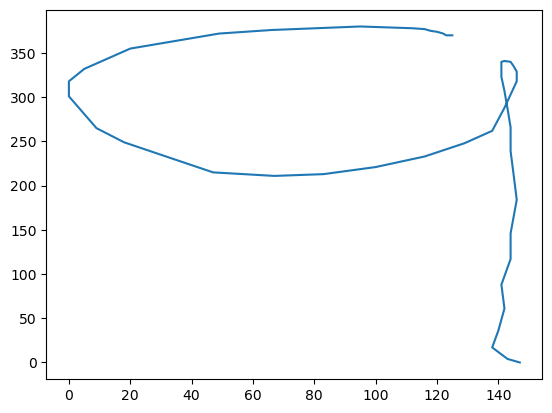

In [10]:
plt.plot(xtrain[100][0][0][:], xtrain[100][0][1][:])
plt.axis('on')
plt.show()

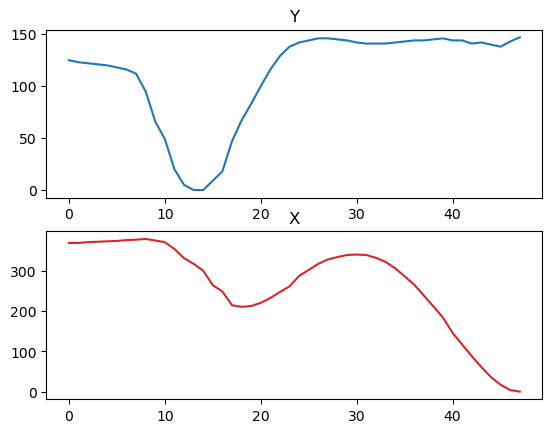

In [11]:
fig, axs = plt.subplots(2)
axs[0].plot(xtrain[100][0][0][:],)
axs[0].set_title('Y')
axs[1].plot(xtrain[100][0][1][:], 'tab:red')
axs[1].set_title('X')

plt.axis('on')
plt.show()

In [12]:
# x = []
# y = []

# for num in range(200):
#     x.append(xtrain[num][0][1][:].astype(int))
#     y.append(xtrain[num][0][0][:].astype(int))


# x_test = []
# y_test = []
# for num in range(98):
#     x_test.append(XTest[num][0][1][:].astype(int))
#     x_test.append(XTest[num][0][0][:].astype(int))



In [13]:
# x = []
# y = []
# max_length = 0  # Variable to keep track of the longest sequence

# for num in range(200):
#     x_sequence = xtrain[num][0][1][:].astype(int)
#     y_sequence = xtrain[num][0][0][:].astype(int)
    
#     # Append the sequences to the lists
#     x.append(x_sequence)
#     y.append(y_sequence)

#     # Update max_length if a longer sequence is found
#     max_length = max(max_length, len(x_sequence), len(y_sequence))

# x_test = []
# y_test = []

# for num in range(98):
#     x_test_sequence = XTest[num][0][1][:].astype(int)
#     y_test_sequence = XTest[num][0][0][:].astype(int)
    
#     # Append the sequences to the test lists
#     x_test.append(x_test_sequence)
#     y_test.append(y_test_sequence)

#     # Update max_length for test data as well
#     max_length = max(max_length, len(x_test_sequence), len(y_test_sequence))

# # Now max_length holds the length of the longest sequence
# print("Longest sequence length:", max_length)

In [14]:

train_label = []
test_label = []

for num in range(200):
    train_label.append((ytrain[num][0].astype(int)) - 1)


for num in range(98):
    test_label.append((YTest[num][0].astype(int)) - 1)



In [15]:
import numpy as np
import scipy.interpolate

# Assuming xtrain and XTest are your training and testing datasets
x = []
y = []
max_length = 163  # The longest sequence length determined earlier

def stretch_sequence(seq, target_len):
    """ Stretches the sequence to the target_len using linear interpolation. """
    original_indices = np.linspace(0, 1, len(seq))
    new_indices = np.linspace(0, 1, target_len)
    interpolator = scipy.interpolate.interp1d(original_indices, seq, kind='linear')
    return interpolator(new_indices)

for num in range(200):
    x_sequence = xtrain[num][0][1][:].astype(int)
    y_sequence = xtrain[num][0][0][:].astype(int)

    # Stretch the sequences
    x_sequence_stretched = stretch_sequence(x_sequence, max_length)
    y_sequence_stretched = stretch_sequence(y_sequence, max_length)

    # Append the stretched sequences to the lists
    x.append(x_sequence_stretched)
    y.append(y_sequence_stretched)

x_test = []
y_test = []

for num in range(98):
    x_test_sequence = XTest[num][0][1][:].astype(int)
    y_test_sequence = XTest[num][0][0][:].astype(int)

    # Stretch the sequences
    x_test_sequence_stretched = stretch_sequence(x_test_sequence, max_length)
    y_test_sequence_stretched = stretch_sequence(y_test_sequence, max_length)

    # Append the stretched sequences to the test lists
    x_test.append(x_test_sequence_stretched)
    y_test.append(y_test_sequence_stretched)

paired_train_data = list(zip(x, y))
paired_test_data = list(zip(x_test, y_test))



In [16]:
print(len(paired_train_data))
print(type(y[1]))
print(type(train_label[1]))

200
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [17]:


class CustomDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # Assuming each sequence is a 1D array and needs to be reshaped
        sequence = torch.tensor(self.sequences[idx], dtype=torch.float32).view(-1, 2)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Assuming labels are integers
        
        return sequence, label




In [18]:
dataset = CustomDataset(paired_train_data, train_label)
dataset_test = CustomDataset(paired_test_data, test_label)

In [19]:
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=False)


In [20]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DualInputLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes=10):
        super(DualInputLSTM, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.2, batch_first=True)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm1(x, (h0, c0))
        out = out[:, -1, :]  

        out = self.fc2(out)
        return out
    

# Creating the model instance



Starting Run 1


C:\Users\denis\AppData\Local\Temp\ipykernel_17064\1539056473.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  sequence = torch.tensor(self.sequences[idx], dtype=torch.float32).view(-1, 2)


Epoch [1/400], Training Loss: 2.2837, Validation Loss: 2.2360, Accuracy: 23.47%
Epoch [2/400], Training Loss: 2.1506, Validation Loss: 2.0849, Accuracy: 26.53%
Epoch [3/400], Training Loss: 1.9540, Validation Loss: 1.9447, Accuracy: 24.49%
Epoch [4/400], Training Loss: 1.7564, Validation Loss: 1.7483, Accuracy: 39.80%
Epoch [5/400], Training Loss: 1.5275, Validation Loss: 1.5441, Accuracy: 53.06%
Epoch [6/400], Training Loss: 1.3437, Validation Loss: 1.3489, Accuracy: 56.12%
Epoch [7/400], Training Loss: 1.2270, Validation Loss: 1.4299, Accuracy: 52.04%
Epoch [8/400], Training Loss: 1.2021, Validation Loss: 1.2715, Accuracy: 59.18%
Epoch [9/400], Training Loss: 1.1563, Validation Loss: 1.1649, Accuracy: 64.29%
Epoch [10/400], Training Loss: 0.9668, Validation Loss: 1.1392, Accuracy: 67.35%
Epoch [11/400], Training Loss: 0.8557, Validation Loss: 1.0606, Accuracy: 65.31%
Epoch [12/400], Training Loss: 0.8694, Validation Loss: 1.2426, Accuracy: 54.08%
Epoch [13/400], Training Loss: 0.8013

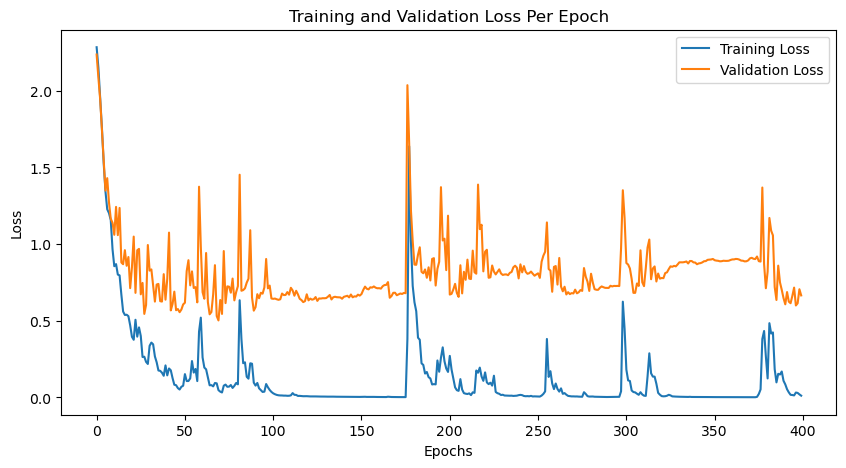

Best Test acc: 94.89795918367346
Starting Run 2
Epoch [1/400], Training Loss: 2.2794, Validation Loss: 2.2137, Accuracy: 22.45%
Epoch [2/400], Training Loss: 2.1245, Validation Loss: 2.0299, Accuracy: 26.53%
Epoch [3/400], Training Loss: 1.9124, Validation Loss: 1.8254, Accuracy: 41.84%
Epoch [4/400], Training Loss: 1.6572, Validation Loss: 1.5283, Accuracy: 56.12%
Epoch [5/400], Training Loss: 1.4260, Validation Loss: 1.4627, Accuracy: 44.90%
Epoch [6/400], Training Loss: 1.2722, Validation Loss: 1.2346, Accuracy: 60.20%
Epoch [7/400], Training Loss: 1.0848, Validation Loss: 1.1654, Accuracy: 65.31%
Epoch [8/400], Training Loss: 0.8965, Validation Loss: 1.0532, Accuracy: 69.39%
Epoch [9/400], Training Loss: 0.7811, Validation Loss: 0.9451, Accuracy: 67.35%
Epoch [10/400], Training Loss: 0.7441, Validation Loss: 0.8466, Accuracy: 74.49%
Epoch [11/400], Training Loss: 0.6681, Validation Loss: 0.9249, Accuracy: 71.43%
Epoch [12/400], Training Loss: 0.7268, Validation Loss: 0.8344, Accura

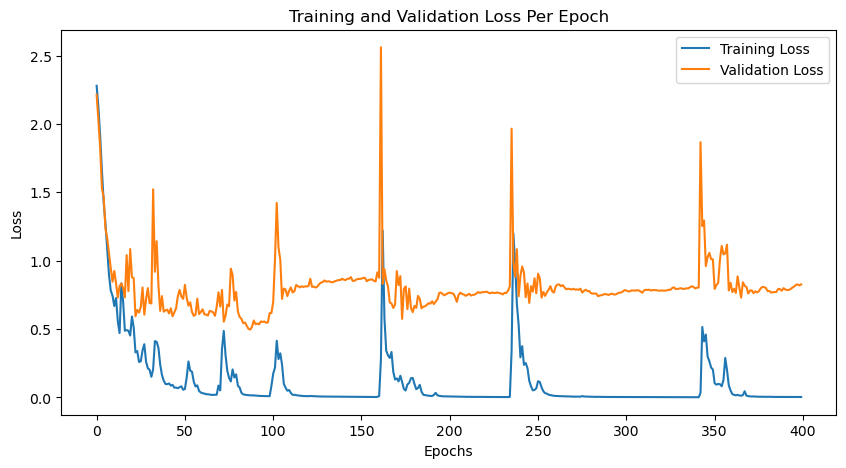

Best Test acc: 94.89795918367346
Starting Run 3
Epoch [1/400], Training Loss: 2.2903, Validation Loss: 2.2348, Accuracy: 22.45%
Epoch [2/400], Training Loss: 2.1717, Validation Loss: 2.0698, Accuracy: 28.57%
Epoch [3/400], Training Loss: 1.9920, Validation Loss: 1.9092, Accuracy: 40.82%
Epoch [4/400], Training Loss: 1.7296, Validation Loss: 1.6751, Accuracy: 46.94%
Epoch [5/400], Training Loss: 1.4329, Validation Loss: 1.4107, Accuracy: 56.12%
Epoch [6/400], Training Loss: 1.2033, Validation Loss: 1.5702, Accuracy: 40.82%
Epoch [7/400], Training Loss: 1.1360, Validation Loss: 1.1248, Accuracy: 68.37%
Epoch [8/400], Training Loss: 0.9283, Validation Loss: 1.1273, Accuracy: 68.37%
Epoch [9/400], Training Loss: 0.8607, Validation Loss: 1.1222, Accuracy: 60.20%
Epoch [10/400], Training Loss: 0.8867, Validation Loss: 0.9806, Accuracy: 72.45%
Epoch [11/400], Training Loss: 0.7051, Validation Loss: 0.9244, Accuracy: 72.45%
Epoch [12/400], Training Loss: 0.6422, Validation Loss: 1.3536, Accura

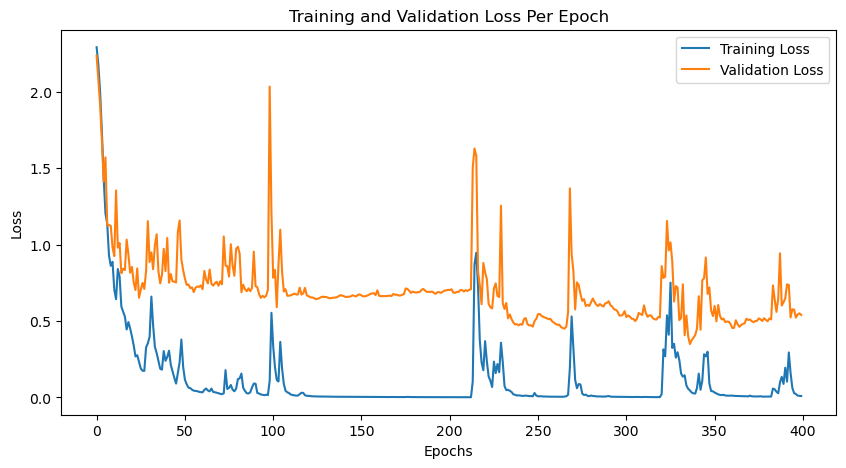

Best Test acc: 94.89795918367346
Starting Run 4
Epoch [1/400], Training Loss: 2.2933, Validation Loss: 2.2542, Accuracy: 21.43%
Epoch [2/400], Training Loss: 2.1539, Validation Loss: 2.0655, Accuracy: 22.45%
Epoch [3/400], Training Loss: 1.9311, Validation Loss: 1.8685, Accuracy: 34.69%
Epoch [4/400], Training Loss: 1.6629, Validation Loss: 1.7088, Accuracy: 31.63%
Epoch [5/400], Training Loss: 1.3999, Validation Loss: 1.3993, Accuracy: 57.14%
Epoch [6/400], Training Loss: 1.1880, Validation Loss: 1.3055, Accuracy: 55.10%
Epoch [7/400], Training Loss: 1.0430, Validation Loss: 1.3333, Accuracy: 55.10%
Epoch [8/400], Training Loss: 1.0124, Validation Loss: 1.1167, Accuracy: 57.14%
Epoch [9/400], Training Loss: 0.8689, Validation Loss: 0.9912, Accuracy: 76.53%
Epoch [10/400], Training Loss: 0.7940, Validation Loss: 1.0592, Accuracy: 59.18%
Epoch [11/400], Training Loss: 0.6783, Validation Loss: 0.8694, Accuracy: 82.65%
Epoch [12/400], Training Loss: 0.6311, Validation Loss: 0.8500, Accura

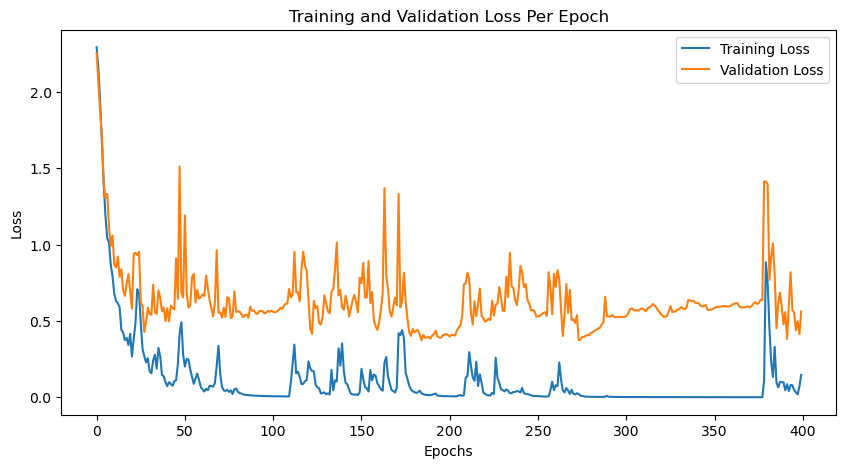

Best Test acc: 94.89795918367346
Starting Run 5
Epoch [1/400], Training Loss: 2.2971, Validation Loss: 2.2692, Accuracy: 5.10%
Epoch [2/400], Training Loss: 2.1987, Validation Loss: 2.0865, Accuracy: 28.57%
Epoch [3/400], Training Loss: 2.0130, Validation Loss: 1.9339, Accuracy: 24.49%
Epoch [4/400], Training Loss: 1.8288, Validation Loss: 1.7921, Accuracy: 28.57%
Epoch [5/400], Training Loss: 1.5249, Validation Loss: 1.5004, Accuracy: 43.88%
Epoch [6/400], Training Loss: 1.3062, Validation Loss: 1.2815, Accuracy: 57.14%
Epoch [7/400], Training Loss: 1.0686, Validation Loss: 1.1160, Accuracy: 64.29%
Epoch [8/400], Training Loss: 1.1827, Validation Loss: 1.4177, Accuracy: 39.80%
Epoch [9/400], Training Loss: 0.9904, Validation Loss: 1.0988, Accuracy: 65.31%
Epoch [10/400], Training Loss: 0.8140, Validation Loss: 1.1843, Accuracy: 63.27%
Epoch [11/400], Training Loss: 0.7295, Validation Loss: 0.9153, Accuracy: 71.43%
Epoch [12/400], Training Loss: 0.6052, Validation Loss: 0.8791, Accurac

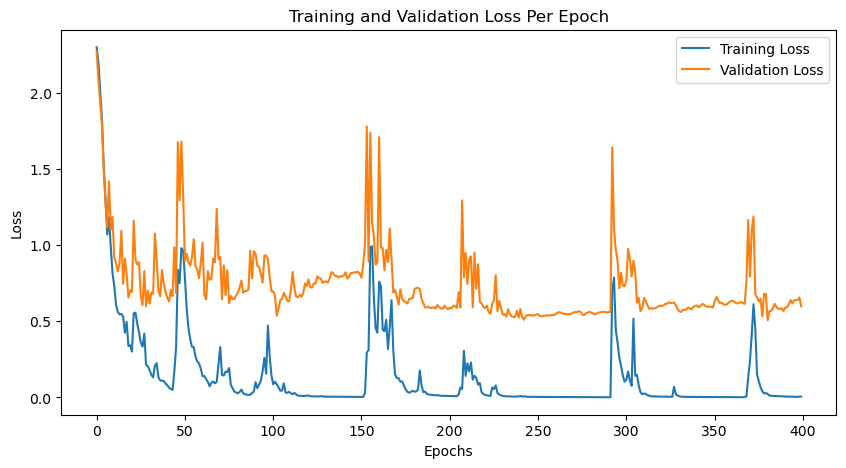

Best Test acc: 94.89795918367346


In [21]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

# Assuming DualInputLSTM and your datasets are correctly defined

best_accuracy = 0.0

# Training and Validation loop
num_epochs = 400
for run in range(5):

    print(f"Starting Run {run+1}")
    model = DualInputLSTM(2, 64, 2).to(device)
    criterion = CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)

    train_loss_values = []
    val_loss_values = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for x1, labels in train_loader:
            x1, labels = x1.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x1)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_loss_values.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for x1, labels in test_loader:
                x1 , labels = x1.to(device), labels.to(device)
                outputs = model(x1)
                loss = criterion(outputs, labels.long())
                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = total_val_loss / len(test_loader)
        val_loss_values.append(avg_val_loss)
        accuracy = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")

        # Save the model with the highest accuracy after 30 epochs
        if epoch >= 40 and accuracy > best_accuracy:
            best_accuracy = accuracy
 
            torch.save(model.state_dict(), 'best_model.pth')
            
        torch.cuda.empty_cache()

# Plotting the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.title("Training and Validation Loss Per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    print(f"Best Test acc: {best_accuracy}")